# SPOTIFY PROJECT

#### This Spotify Project is about collecting data using Spotify API, then doing Exploratory Data Analysis (EDA), and clustering using K-Means.

## 1. CRAWLING DATA PLAYLIST WITH SPOTIFY API

In this step I collect spotify data from my account with Best of The Decade For You playlist that spotify creates for me.

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time

In [2]:
# Connecting to Spotify API

client_id = "1e0694e359c041ba9f23fa5d30faa8a8"
client_secret = "2bebcc2e0f9e42378aa2c54f9b018e33"

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [3]:
# Retrieve the Track ID data of each song in the playlist data

def get_track_ids(user, playlist_id):
    ids = []
    playlist = sp.user_playlist(user, playlist_id)
    for item in playlist['tracks']['items']:
        track = item['track']
        ids.append(track['id'])
    return ids

ids = get_track_ids('arsyaab', '37i9dQZF1DXaMu9xyX1HzK')

In [4]:
print(len(ids))
print(ids)

100
['7MXVkk9YMctZqd1Srtv4MB', '3w3y8KPTfNeOKPiqUTakBh', '2QjOHCTQ1Jl3zawyYOpxh6', '7qEHsqek33rTcFNT9PFqLf', '1zi7xx7UVEFkmKfv06H8x0', '3xKsf9qdS1CyvXSMEid6g8', '68Dni7IE4VyPkTOH9mRWHr', '5uCax9HTNlzGybIStD3vDh', '0pqnGHJpmpxLKifKRmU6WP', '2tpWsVSb9UEmDRxAl1zhX1', '0KKkJNfGyhkQ5aFogxQAPU', '6RUKPb4LETWmmr3iAEQktW', '0tgVpDi06FyKpA1z0VMD4v', '5FVd6KXrgO9B3JPmC8OPst', '3B54sVLJ402zGa6Xm4YGNe', '3GCdLUSnKSMJhs4Tj6CV3s', '7JJmb5XwzOO8jgpou264Ml', '1zB4vmk8tFRmM9UULNzbLB', '0nrRP2bk19rLc0orkWPQk2', '21jGcNKet2qwijlDFuPiPb', '7qiZfU4dY1lWllzX7mPBI3', '6K4t31amVTZDgR3sKmwUJJ', '4kbj5MwxO1bq9wjT5g9HaA', '3U4isOIWM3VvDubwSI3y7a', '7w87IxuO7BDcJ3YUqCyMTT', '3DK6m7It6Pw857FcQftMds', '7BKLCZ1jbUBVqRi2FVlTVw', '4cluDES4hQEUhmXj6TXkSo', '0azC730Exh71aQlOt9Zj3y', '3CRDbSIZ4r5MsZ0YwxuEkn', '4HlFJV71xXKIGcU3kRyttv', '7BqBn9nzAq8spo5e7cZ0dJ', '15JINEqzVMv3SvJTAXAKED', '3QGsuHI8jO1Rx4JWLUh9jd', '7ef4DlsgrMEH11cDZd32M6', '2nMeu6UenVvwUktBCpLMK9', '5oO3drDxtziYU2H1X23ZIp', '0HPD5WQqrq7wPWR7P7Dw1i', '0FDzzr

In [5]:
# Create a function to get all tracks information

def get_track_features(id):
    meta = sp.track(id)
    features = sp.audio_features(id)
    
    # meta
    name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    release_date = meta['album']['release_date']
    length = meta['duration_ms']
    popularity = meta['popularity']
    
    # features
    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    time_signature = features[0]['time_signature']
    
    track = [name, album, artist, release_date, length, popularity, acousticness, danceability, energy,
             instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
    return track
    

Definitions of the variables collected can be found on the spotify web developer page https://developer.spotify.com/documentation/web-api

In [6]:
# loop over track ids

tracks = []

for i in range(len(ids)):
    time.sleep(.5)
    track = get_track_features(ids[i])
    tracks.append(track)
    

In [7]:
# Create dataset

df = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date', 'length', 'popularity',
                                     'acousticness', 'danceability', 'energy', 'instrumentalness',
                                     'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature'])
df.head()

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Starboy,Starboy,The Weeknd,2016-11-25,230453,91,0.14100,0.679,0.587,0.000006,0.137,-7.015,0.2760,186.003,4
1,Locked out of Heaven,Unorthodox Jukebox,Bruno Mars,2012-12-07,233478,90,0.04900,0.726,0.698,0.000000,0.309,-4.165,0.0431,143.994,4
2,Sweater Weather,I Love You.,The Neighbourhood,2013-04-19,240400,89,0.04950,0.612,0.807,0.017700,0.101,-2.810,0.0336,124.053,4
3,Someone You Loved,Divinely Uninspired To A Hellish Extent,Lewis Capaldi,2019-05-17,182160,89,0.75100,0.501,0.405,0.000000,0.105,-5.679,0.0319,109.891,4
4,One Dance,Views,Drake,2016-05-06,173986,89,0.00776,0.792,0.625,0.001800,0.329,-5.609,0.0536,103.967,4


In [169]:
# Save the data in an excel file

# df.to_csv("spotify_data.csv", sep = ',')

## 2. EXPLORATORY DATA ANALYSIS (EDA)

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
sns.set(style="darkgrid")
import statistics as stat
import plotly.express as px

### Load Data

In [9]:
spotify = pd.read_csv("spotify_data.csv")
spotify.head()

,Unnamed: 0,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,0,Starboy,Starboy,The Weeknd,2016-11-25,230453,91,0.14100,0.679,0.587,0.000006,0.137,-7.015,0.2760,186.003,4
1,1,Locked out of Heaven,Unorthodox Jukebox,Bruno Mars,2012-12-07,233478,90,0.04900,0.726,0.698,0.000000,0.309,-4.165,0.0431,143.994,4
2,2,Sweater Weather,I Love You.,The Neighbourhood,2013-04-19,240400,89,0.04950,0.612,0.807,0.017700,0.101,-2.810,0.0336,124.053,4
3,3,Someone You Loved,Divinely Uninspired To A Hellish Extent,Lewis Capaldi,2019-05-17,182160,89,0.75100,0.501,0.405,0.000000,0.105,-5.679,0.0319,109.891,4
4,4,One Dance,Views,Drake,2016-05-06,173986,89,0.00776,0.792,0.625,0.001800,0.329,-5.609,0.0536,103.967,4


In [10]:
spotify.drop (['Unnamed: 0'], axis =1, inplace=True)

In [11]:
spotify

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Starboy,Starboy,The Weeknd,2016-11-25,230453,91,0.14100,0.679,0.587,0.000006,0.1370,-7.015,0.2760,186.003,4
1,Locked out of Heaven,Unorthodox Jukebox,Bruno Mars,2012-12-07,233478,90,0.04900,0.726,0.698,0.000000,0.3090,-4.165,0.0431,143.994,4
2,Sweater Weather,I Love You.,The Neighbourhood,2013-04-19,240400,89,0.04950,0.612,0.807,0.017700,0.1010,-2.810,0.0336,124.053,4
3,Someone You Loved,Divinely Uninspired To A Hellish Extent,Lewis Capaldi,2019-05-17,182160,89,0.75100,0.501,0.405,0.000000,0.1050,-5.679,0.0319,109.891,4
4,One Dance,Views,Drake,2016-05-06,173986,89,0.00776,0.792,0.625,0.001800,0.3290,-5.609,0.0536,103.967,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,EARFQUAKE,IGOR,"Tyler, The Creator",2019-05-17,190066,81,0.23000,0.554,0.498,0.000006,0.7950,-8.866,0.0685,79.635,4
96,Danza Kuduro,Meet The Orphans,Don Omar,2010-01-01,198773,81,0.08460,0.400,0.915,0.000000,0.0503,-4.890,0.2800,88.917,3
97,Heathens,Heathens,Twenty One Pilots,2016-06-16,195920,81,0.08410,0.732,0.396,0.000036,0.1050,-9.348,0.0286,90.024,4
98,Centuries,American Beauty/American Psycho,Fall Out Boy,2015-01-20,228360,81,0.00359,0.393,0.858,0.000000,0.1020,-2.868,0.0729,176.042,4


### Data Cleaning

In [12]:
spotify.isna().sum()

name                0
album               0
artist              0
release_date        0
length              0
popularity          0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
dtype: int64

In [13]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              100 non-null    object 
 1   album             100 non-null    object 
 2   artist            100 non-null    object 
 3   release_date      100 non-null    object 
 4   length            100 non-null    int64  
 5   popularity        100 non-null    int64  
 6   acousticness      100 non-null    float64
 7   danceability      100 non-null    float64
 8   energy            100 non-null    float64
 9   instrumentalness  100 non-null    float64
 10  liveness          100 non-null    float64
 11  loudness          100 non-null    float64
 12  speechiness       100 non-null    float64
 13  tempo             100 non-null    float64
 14  time_signature    100 non-null    int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 11.8+ KB


In [14]:
spotify.shape

(100, 15)

In [15]:
spotify.columns

Index(['name', 'album', 'artist', 'release_date', 'length', 'popularity',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature'],
      dtype='object')

In [16]:
len(spotify.columns)

15

In [17]:
spotify.describe()

,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,229293.480000,84.440000,0.212861,0.647290,0.632760,0.005767,0.162759,-5.939990,0.092003,114.696780,3.960000
std,53013.642637,2.119272,0.235529,0.126762,0.186148,0.024573,0.132539,2.210361,0.094566,26.792254,0.242878
min,157560.000000,81.000000,0.000176,0.324000,0.111000,0.000000,0.034400,-14.084000,0.023200,65.043000,3.000000
25%,200556.000000,83.000000,0.036200,0.574750,0.493750,0.000000,0.094075,-7.103750,0.036950,95.048750,4.000000
50%,219719.500000,84.000000,0.136500,0.666500,0.641500,0.000000,0.110000,-5.604000,0.052750,116.643500,4.000000
75%,242613.000000,86.000000,0.312750,0.745750,0.788000,0.000082,0.167000,-4.423500,0.107500,125.729750,4.000000
max,547733.000000,91.000000,0.978000,0.908000,0.963000,0.134000,0.795000,-2.494000,0.463000,186.003000,5.000000


### Data Analysis

#### Top 5 Most Popular Artists

In [18]:
top_5_artists = spotify.groupby('artist').count().sort_values(by='name', ascending=False)['name'][:5]
top_5_artists

artist
Post Malone      4
Bruno Mars       3
Frank Ocean      3
Calvin Harris    3
Justin Bieber    3
Name: name, dtype: int64

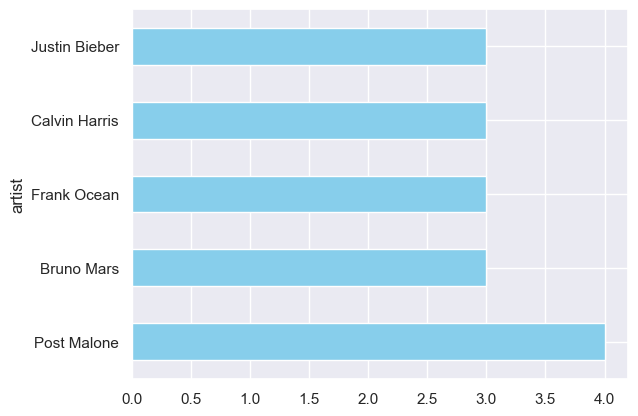

In [19]:
top_5_artists.plot.barh(color='skyblue')
plt.show()

#### Top 5 Loudest Tracks

In [18]:
top_5_loudest_tracks = spotify[['loudness', 'name']].sort_values(by='loudness', ascending=True)[:5]
top_5_loudest_tracks

,loudness,name
45,-14.084,when the party's over
39,-11.195,Thinkin Bout You
90,-10.965,bad guy
55,-10.732,7 rings
82,-10.614,Redbone


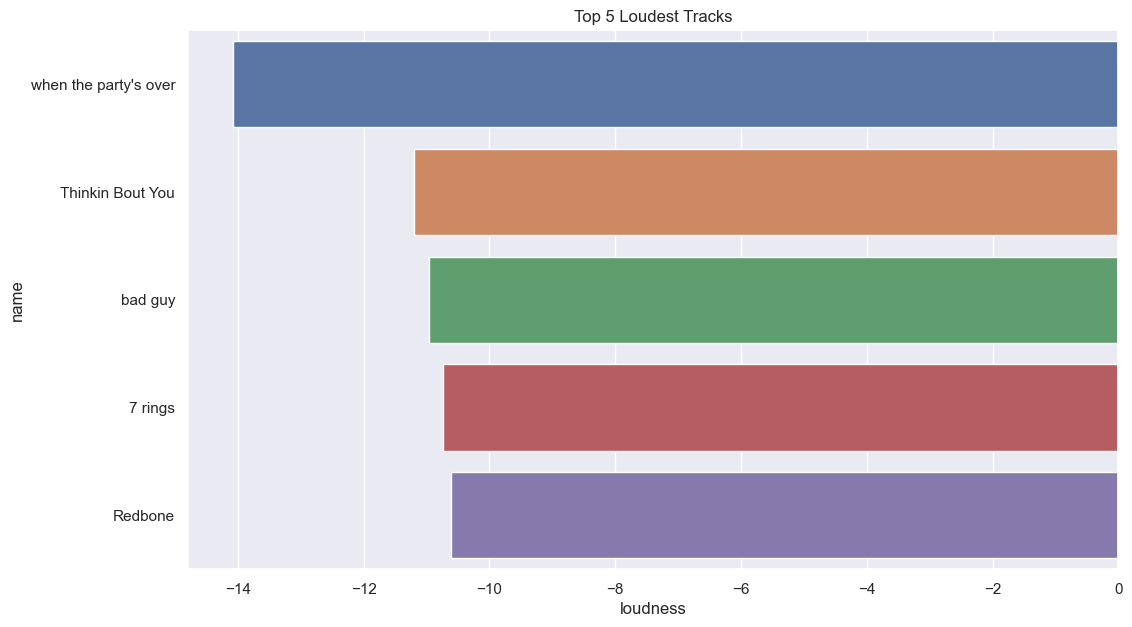

In [19]:
plt.figure(figsize=(12,7))
sns.barplot(x='loudness', y='name', data=top_5_loudest_tracks)
plt.title("Top 5 Loudest Tracks")
plt.show()

#### Artist with The Most Danceability Song

In [20]:
top_5_artist_danceability_songs = spotify[['danceability', 'name', 'artist']].sort_values(by='danceability', ascending=False)[:5]
top_5_artist_danceability_songs

,danceability,name,artist
41,0.908,HUMBLE.,Kendrick Lamar
16,0.866,There's Nothing Holdin' Me Back,Shawn Mendes
61,0.856,Uptown Funk (feat. Bruno Mars),Mark Ronson
9,0.853,That's What I Like,Bruno Mars
48,0.834,SICKO MODE,Travis Scott


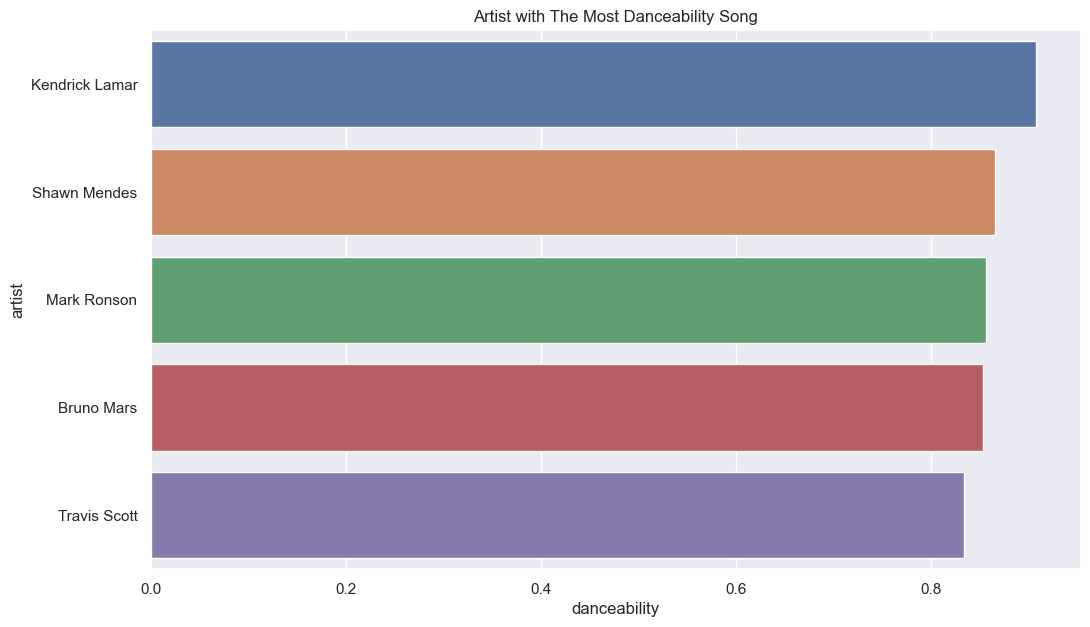

In [21]:
plt.figure(figsize=(12,7))
sns.barplot(x='danceability', y='artist', data=top_5_artist_danceability_songs)
plt.title('Artist with The Most Danceability Song')
plt.show()

#### Top 5 Instrumental Tracks

In [22]:
top_5_instrumental_tracks = spotify[['instrumentalness','name', 'artist']].sort_values(by='instrumentalness', ascending=False)[:5]
top_5_instrumental_tracks

,instrumentalness,name,artist
18,0.1340,Thunder,Imagine Dragons
90,0.1300,bad guy,Billie Eilish
28,0.1190,This Is What You Came For,Calvin Harris
25,0.1150,Pumped Up Kicks,Foster The People
44,0.0178,Summer,Calvin Harris


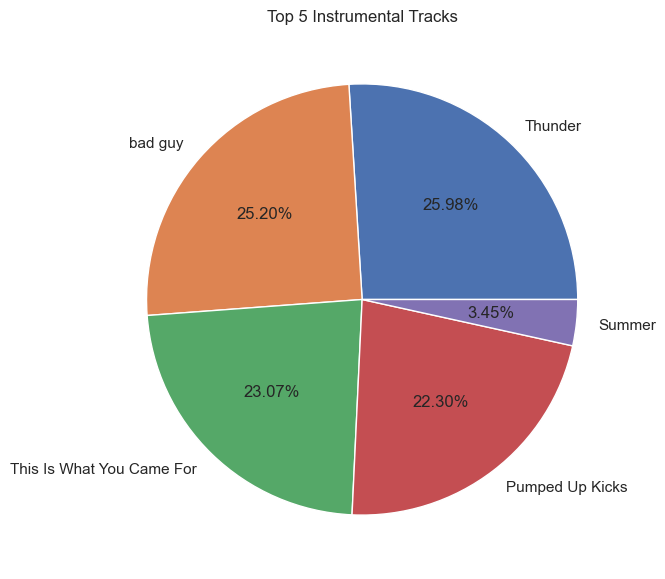

In [23]:
plt.figure(figsize=(12,7))
plt.pie(x='instrumentalness', data=top_5_instrumental_tracks, autopct='%1.2f%%', labels=top_5_instrumental_tracks.name)
plt.title('Top 5 Instrumental Tracks')
plt.show()

#### Top 10 Popular Songs

In [52]:
top_10_popular_tracks = spotify[['popularity','name']].sort_values(by='popularity', ascending=False)[:10]
top_10_popular_tracks

,popularity,name
0,91,Starboy
1,90,Locked out of Heaven
2,89,Sweater Weather
3,89,Someone You Loved
4,89,One Dance
5,89,Pink + White
6,88,No Role Modelz
7,88,Say You Won't Let Go
12,87,Perfect
14,87,Unforgettable


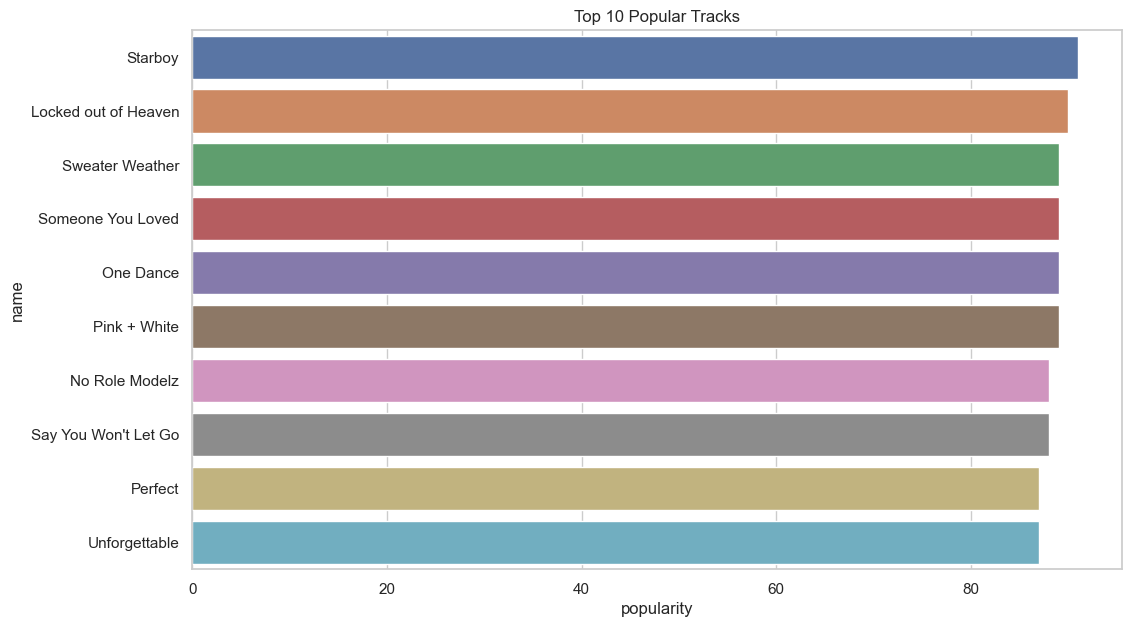

In [53]:
plt.figure(figsize=(12,7))
sns.barplot(x='popularity', y='name', data=top_10_popular_tracks)
plt.title('Top 10 Popular Tracks')
plt.show()

#### Multiple Features Plot

In [54]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              100 non-null    object 
 1   album             100 non-null    object 
 2   artist            100 non-null    object 
 3   release_date      100 non-null    object 
 4   length            100 non-null    int64  
 5   popularity        100 non-null    int64  
 6   acousticness      100 non-null    float64
 7   danceability      100 non-null    float64
 8   energy            100 non-null    float64
 9   instrumentalness  100 non-null    float64
 10  liveness          100 non-null    float64
 11  loudness          100 non-null    float64
 12  speechiness       100 non-null    float64
 13  tempo             100 non-null    float64
 14  time_signature    100 non-null    int64  
 15  cluster           100 non-null    int32  
dtypes: float64(8), int32(1), int64(3), object(4)


In [55]:
spotify_num = spotify.iloc[:, 5:16]
spotify_num.head()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
0,91,0.14100,0.679,0.587,0.000006,0.137,-7.015,0.2760,186.003,4,1
1,90,0.04900,0.726,0.698,0.000000,0.309,-4.165,0.0431,143.994,4,1
2,89,0.04950,0.612,0.807,0.017700,0.101,-2.810,0.0336,124.053,4,1
3,89,0.75100,0.501,0.405,0.000000,0.105,-5.679,0.0319,109.891,4,0
4,89,0.00776,0.792,0.625,0.001800,0.329,-5.609,0.0536,103.967,4,1


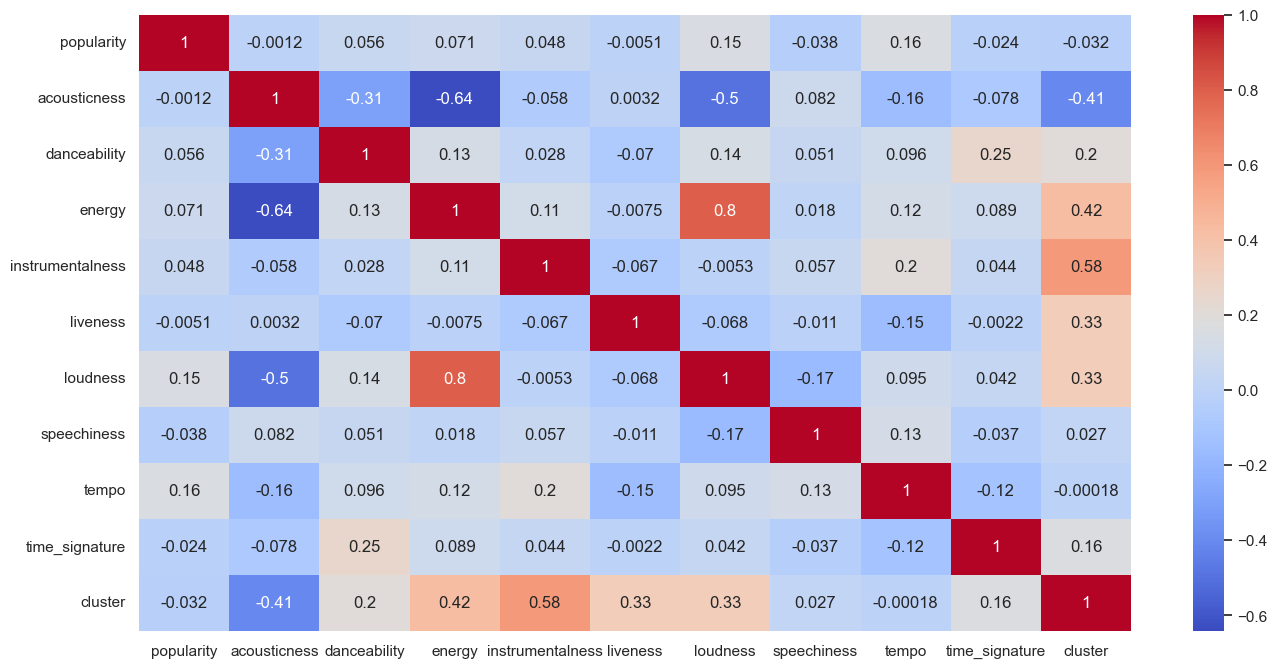

In [56]:
# checking correlation

plt.figure(figsize=(16,8))
sns.set(style='whitegrid')
corr = spotify_num.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

##### It can be seen in the figure above that the energy and loudness variables have a strong positive correlation of 0,8.

C:\Users\Semanggi University\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


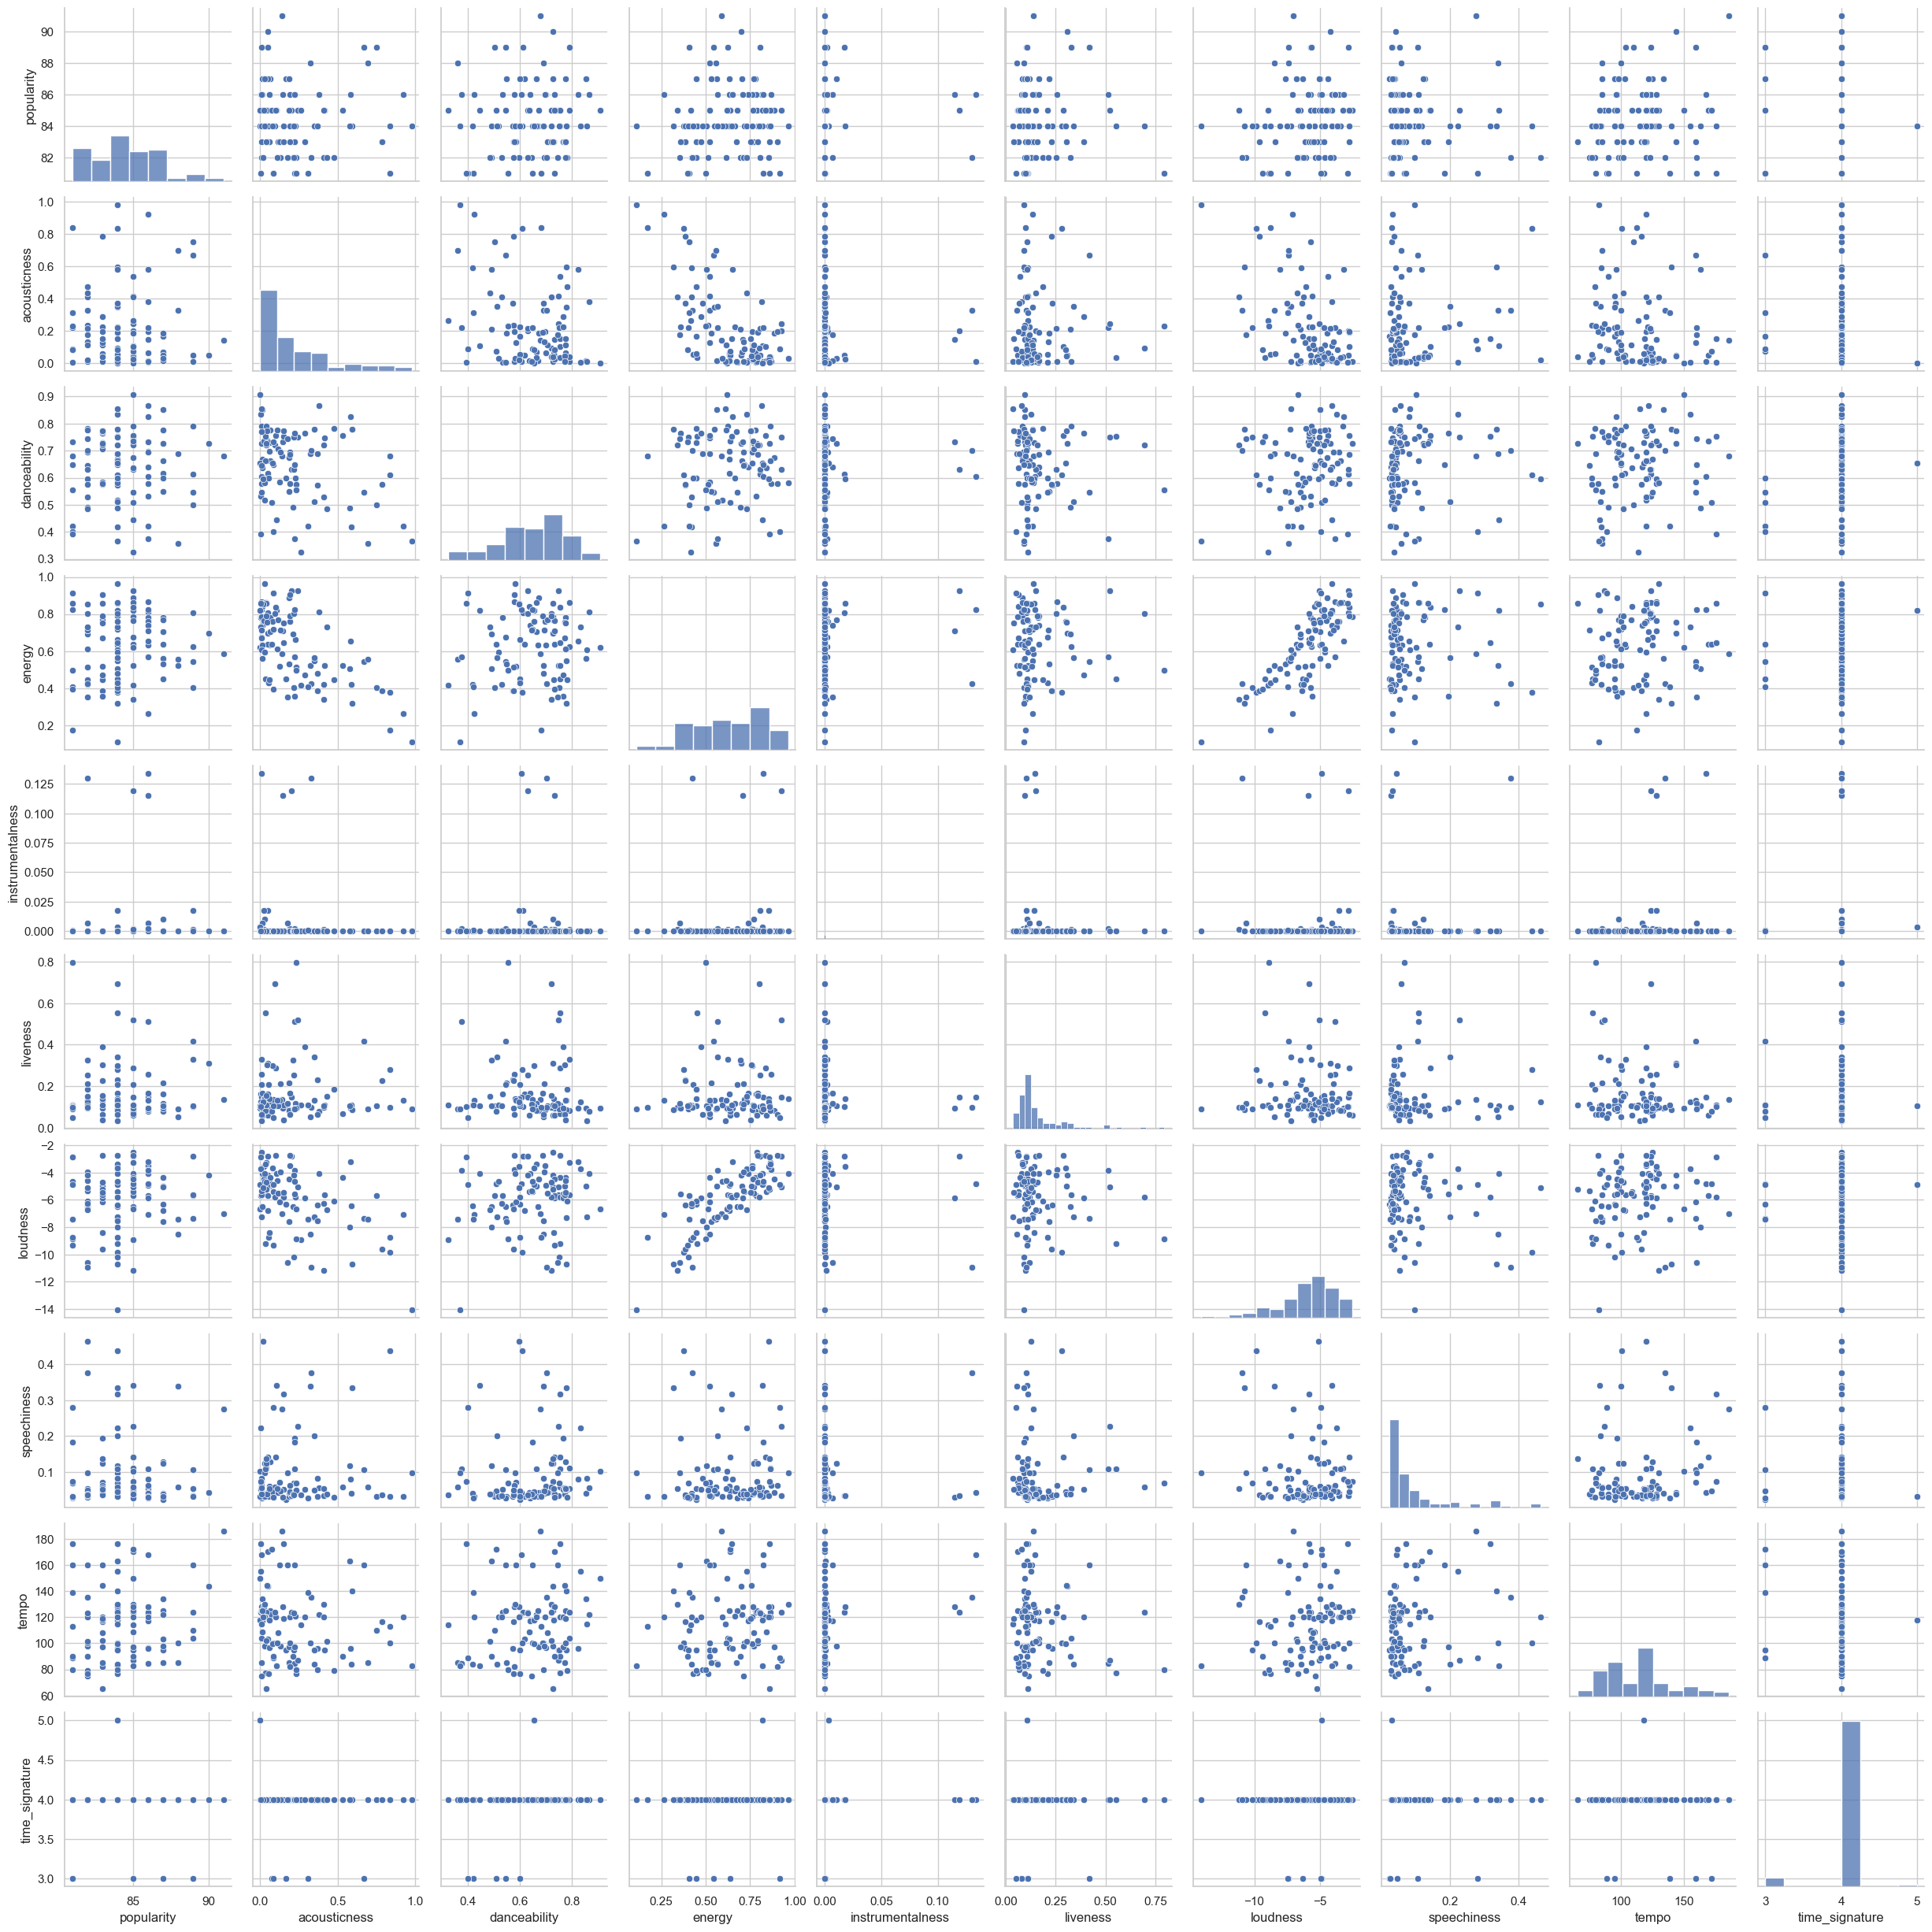

In [30]:
# Visualization of the relationship between numerical variables

sns.pairplot(spotify_num);

One of the insights from the visualization above shows that the energy and loudness variables that have a high positive correlation have a plot that follows a straight line which means that if the energy is high value then loudness will also be high value and vice versa.

## 3. K-MEANS CLUSTERING

### Preprocessing

In [57]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              100 non-null    object 
 1   album             100 non-null    object 
 2   artist            100 non-null    object 
 3   release_date      100 non-null    object 
 4   length            100 non-null    int64  
 5   popularity        100 non-null    int64  
 6   acousticness      100 non-null    float64
 7   danceability      100 non-null    float64
 8   energy            100 non-null    float64
 9   instrumentalness  100 non-null    float64
 10  liveness          100 non-null    float64
 11  loudness          100 non-null    float64
 12  speechiness       100 non-null    float64
 13  tempo             100 non-null    float64
 14  time_signature    100 non-null    int64  
 15  cluster           100 non-null    int32  
dtypes: float64(8), int32(1), int64(3), object(4)


In [58]:
spotify2 = spotify.drop(['release_date', 'name', 'album', 'artist', 'popularity'], axis=1)
spotify2

,length,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
0,230453,0.14100,0.679,0.587,0.000006,0.1370,-7.015,0.2760,186.003,4,1
1,233478,0.04900,0.726,0.698,0.000000,0.3090,-4.165,0.0431,143.994,4,1
2,240400,0.04950,0.612,0.807,0.017700,0.1010,-2.810,0.0336,124.053,4,1
3,182160,0.75100,0.501,0.405,0.000000,0.1050,-5.679,0.0319,109.891,4,0
4,173986,0.00776,0.792,0.625,0.001800,0.3290,-5.609,0.0536,103.967,4,1
...,...,...,...,...,...,...,...,...,...,...,...
95,190066,0.23000,0.554,0.498,0.000006,0.7950,-8.866,0.0685,79.635,4,2
96,198773,0.08460,0.400,0.915,0.000000,0.0503,-4.890,0.2800,88.917,3,1
97,195920,0.08410,0.732,0.396,0.000036,0.1050,-9.348,0.0286,90.024,4,0
98,228360,0.00359,0.393,0.858,0.000000,0.1020,-2.868,0.0729,176.042,4,1


### Standardization of data

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
spotify2_scaler = pd.DataFrame(scaler.fit_transform(spotify2), columns=spotify2.columns)
spotify2_scaler.head()

,length,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
0,0.021982,-0.306641,0.251414,-0.247064,-0.235609,-0.195329,-0.488801,1.955498,2.674857,0.165521,0.070186
1,0.079331,-0.699219,0.624055,0.352239,-0.235869,1.108938,0.807077,-0.519735,1.099005,0.165521,0.070186
2,0.210558,-0.697086,-0.279798,0.940743,0.488075,-0.468315,1.423187,-0.620700,0.350973,0.165521,0.070186
3,-0.893561,2.296324,-1.159865,-1.229704,-0.235869,-0.437983,0.118671,-0.638768,-0.180276,0.165521,-1.333539
4,-1.048525,-0.875197,1.147338,-0.041897,-0.162248,1.260597,0.150499,-0.408143,-0.402498,0.165521,0.070186


### Implementation of The Clustering Model

In [60]:
from sklearn.cluster import KMeans

cluster = []

for i in range(1,11):
    model = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=1000, random_state=42)
    model.fit(spotify2_scaler)
    cluster.append(model.inertia_)

C:\Users\Semanggi University\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Semanggi University\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Semanggi University\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Semanggi University\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: User

### Determining The Number of Clusters Using The Elbow Graph

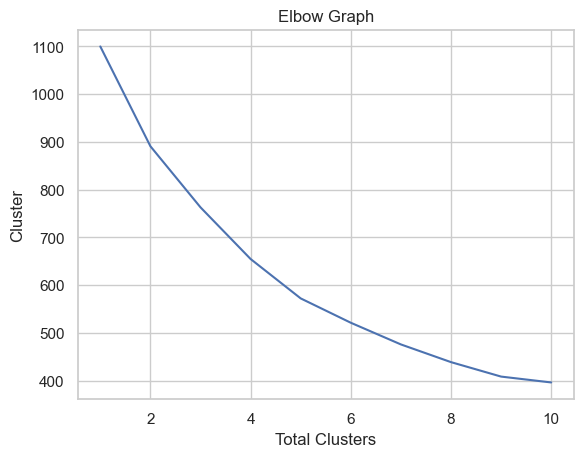

In [61]:
plt.plot(range(1,11), cluster)
plt.title('Elbow Graph')
plt.xlabel('Total Clusters')
plt.ylabel('Cluster')
plt.show()

In the chart above it can be seen that the line that is experiencing a steep decline is between 2 and 4. so will be selected the number of clusters is 4.

In [62]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=500, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(spotify2_scaler)

C:\Users\Semanggi University\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [63]:
spotify2_scaler['cluster'] = y_kmeans
spotify2_scaler

,length,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
0,0.021982,-0.306641,0.251414,-0.247064,-0.235609,-0.195329,-0.488801,1.955498,2.674857,0.165521,3
1,0.079331,-0.699219,0.624055,0.352239,-0.235869,1.108938,0.807077,-0.519735,1.099005,0.165521,3
2,0.210558,-0.697086,-0.279798,0.940743,0.488075,-0.468315,1.423187,-0.620700,0.350973,0.165521,3
3,-0.893561,2.296324,-1.159865,-1.229704,-0.235869,-0.437983,0.118671,-0.638768,-0.180276,0.165521,2
4,-1.048525,-0.875197,1.147338,-0.041897,-0.162248,1.260597,0.150499,-0.408143,-0.402498,0.165521,3
...,...,...,...,...,...,...,...,...,...,...,...
95,-0.743678,0.073136,-0.739653,-0.727586,-0.235625,4.794250,-1.330439,-0.249787,-1.315246,0.165521,0
96,-0.578610,-0.547309,-1.960646,1.523848,-0.235869,-0.852771,0.477424,1.998010,-0.967058,-3.972508,3
97,-0.632698,-0.549442,0.671626,-1.278296,-0.234405,-0.437983,-1.549601,-0.673840,-0.925532,0.165521,2
98,-0.017697,-0.892991,-2.016146,1.216098,-0.235869,-0.460732,1.396815,-0.203024,2.301197,0.165521,3


In [64]:
spotify2['cluster'] = y_kmeans
spotify2

,length,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
0,230453,0.14100,0.679,0.587,0.000006,0.1370,-7.015,0.2760,186.003,4,3
1,233478,0.04900,0.726,0.698,0.000000,0.3090,-4.165,0.0431,143.994,4,3
2,240400,0.04950,0.612,0.807,0.017700,0.1010,-2.810,0.0336,124.053,4,3
3,182160,0.75100,0.501,0.405,0.000000,0.1050,-5.679,0.0319,109.891,4,2
4,173986,0.00776,0.792,0.625,0.001800,0.3290,-5.609,0.0536,103.967,4,3
...,...,...,...,...,...,...,...,...,...,...,...
95,190066,0.23000,0.554,0.498,0.000006,0.7950,-8.866,0.0685,79.635,4,0
96,198773,0.08460,0.400,0.915,0.000000,0.0503,-4.890,0.2800,88.917,3,3
97,195920,0.08410,0.732,0.396,0.000036,0.1050,-9.348,0.0286,90.024,4,2
98,228360,0.00359,0.393,0.858,0.000000,0.1020,-2.868,0.0729,176.042,4,3


In [65]:
spotify['cluster'] = y_kmeans
spotify

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
0,Starboy,Starboy,The Weeknd,2016-11-25,230453,91,0.14100,0.679,0.587,0.000006,0.1370,-7.015,0.2760,186.003,4,3
1,Locked out of Heaven,Unorthodox Jukebox,Bruno Mars,2012-12-07,233478,90,0.04900,0.726,0.698,0.000000,0.3090,-4.165,0.0431,143.994,4,3
2,Sweater Weather,I Love You.,The Neighbourhood,2013-04-19,240400,89,0.04950,0.612,0.807,0.017700,0.1010,-2.810,0.0336,124.053,4,3
3,Someone You Loved,Divinely Uninspired To A Hellish Extent,Lewis Capaldi,2019-05-17,182160,89,0.75100,0.501,0.405,0.000000,0.1050,-5.679,0.0319,109.891,4,2
4,One Dance,Views,Drake,2016-05-06,173986,89,0.00776,0.792,0.625,0.001800,0.3290,-5.609,0.0536,103.967,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,EARFQUAKE,IGOR,"Tyler, The Creator",2019-05-17,190066,81,0.23000,0.554,0.498,0.000006,0.7950,-8.866,0.0685,79.635,4,0
96,Danza Kuduro,Meet The Orphans,Don Omar,2010-01-01,198773,81,0.08460,0.400,0.915,0.000000,0.0503,-4.890,0.2800,88.917,3,3
97,Heathens,Heathens,Twenty One Pilots,2016-06-16,195920,81,0.08410,0.732,0.396,0.000036,0.1050,-9.348,0.0286,90.024,4,2
98,Centuries,American Beauty/American Psycho,Fall Out Boy,2015-01-20,228360,81,0.00359,0.393,0.858,0.000000,0.1020,-2.868,0.0729,176.042,4,3


In [66]:
# spotify.to_excel(r'hasil_cluster.xlsx', index=False)

In [67]:
clus_0 = spotify2[spotify2['cluster']==0]
clus_1 = spotify2[spotify2['cluster']==1]
clus_2 = spotify2[spotify2['cluster']==2]
clus_3 = spotify2[spotify2['cluster']==3]

In [68]:
spotify2.cluster.value_counts()

cluster
3    61
2    24
0    11
1     4
Name: count, dtype: int64

In [69]:
# DataFrame 

spotify_result = pd.DataFrame()

spotify_result['0'] = clus_0.mean()
spotify_result['1'] = clus_1.mean()
spotify_result['2'] = clus_2.mean()
spotify_result['3'] = clus_3.mean()
spotify_result

,0,1,2,3
length,291182.363636,210748.250000,226328.000000,220516.016393
acousticness,0.232391,0.169677,0.491779,0.102432
danceability,0.620182,0.667500,0.566583,0.682607
energy,0.587545,0.721000,0.408000,0.723557
instrumentalness,0.000232,0.124500,0.000432,0.001078
liveness,0.420509,0.122650,0.137417,0.128880
loudness,-6.600000,-6.108500,-8.459625,-4.818590
speechiness,0.088455,0.120300,0.092346,0.090652
tempo,89.763364,138.765500,111.306417,118.948607
time_signature,4.000000,4.000000,3.875000,3.983607


In the average data above can be seen that the variables in Cluster 0 which has the highest average value are variables danceability, energy, and loudness. So that this cluster is named Alternative genre. in Cluster 1, the variable that has the highest average value is the liveness variable. So the suitable genre name is Jazz. The variable that has the highest average value in Cluster 2 is acousticness so the suitable genre name is Pop. As for the variables that have the highest average value in Cluster 4 are instrumentalness, speechiness, and tempo so that the suitable genre name is New Age.

In [70]:
# The genre name of the cluster

spotify_result = pd.DataFrame()

# danceability, energy, loudness
spotify_result['Alternative'] = clus_0.mean()

# liveness
spotify_result['Jazz'] = clus_1.mean()

# acousticness
spotify_result['Pop'] = clus_2.mean()

# instrumentalness, speechiness, tempo
spotify_result['New Age'] = clus_3.mean()

spotify_result

,Alternative,Jazz,Pop,New Age
length,291182.363636,210748.250000,226328.000000,220516.016393
acousticness,0.232391,0.169677,0.491779,0.102432
danceability,0.620182,0.667500,0.566583,0.682607
energy,0.587545,0.721000,0.408000,0.723557
instrumentalness,0.000232,0.124500,0.000432,0.001078
liveness,0.420509,0.122650,0.137417,0.128880
loudness,-6.600000,-6.108500,-8.459625,-4.818590
speechiness,0.088455,0.120300,0.092346,0.090652
tempo,89.763364,138.765500,111.306417,118.948607
time_signature,4.000000,4.000000,3.875000,3.983607


#### Cluster Visualization with Multiple Variable Combinations

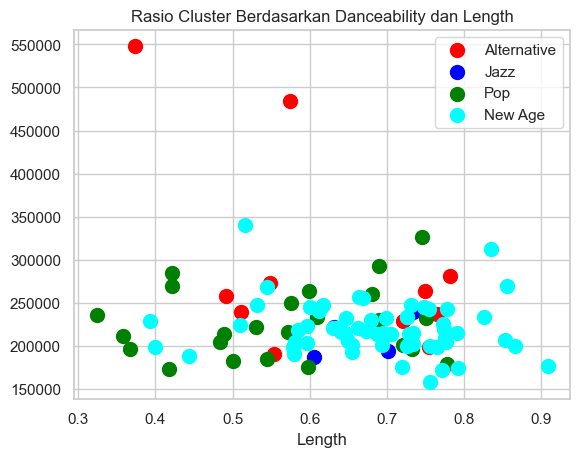

In [71]:
plt.scatter(clus_0['danceability'], clus_0['length'], s=100, c='red', label='Alternative')
plt.scatter(clus_1['danceability'], clus_1['length'], s=100, c='blue', label='Jazz')
plt.scatter(clus_2['danceability'], clus_2['length'], s=100, c='green', label='Pop')
plt.scatter(clus_3['danceability'], clus_3['length'], s=100, c='cyan', label='New Age')
plt.title('Rasio Cluster Berdasarkan Danceability dan Length')
plt.xlabel('Danceability')
plt.xlabel('Length')
plt.legend()
plt.show()




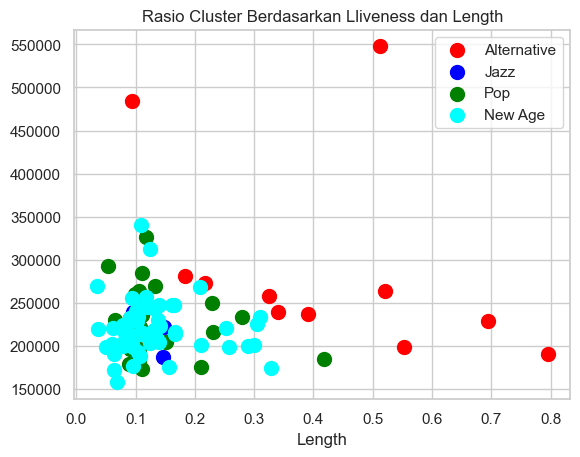

In [72]:
plt.scatter(clus_0['liveness'], clus_0['length'], s=100, c='red', label='Alternative')
plt.scatter(clus_1['liveness'], clus_1['length'], s=100, c='blue', label='Jazz')
plt.scatter(clus_2['liveness'], clus_2['length'], s=100, c='green', label='Pop')
plt.scatter(clus_3['liveness'], clus_3['length'], s=100, c='cyan', label='New Age')
plt.title('Rasio Cluster Berdasarkan Lliveness dan Length')
plt.xlabel('Liveness')
plt.xlabel('Length')
plt.legend()
plt.show()




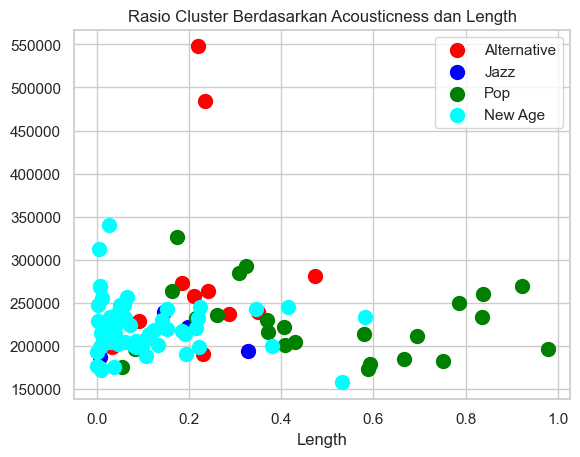

In [73]:
plt.scatter(clus_0['acousticness'], clus_0['length'], s=100, c='red', label='Alternative')
plt.scatter(clus_1['acousticness'], clus_1['length'], s=100, c='blue', label='Jazz')
plt.scatter(clus_2['acousticness'], clus_2['length'], s=100, c='green', label='Pop')
plt.scatter(clus_3['acousticness'], clus_3['length'], s=100, c='cyan', label='New Age')
plt.title('Rasio Cluster Berdasarkan Acousticness dan Length')
plt.xlabel('Acousticness')
plt.xlabel('Length')
plt.legend()
plt.show()




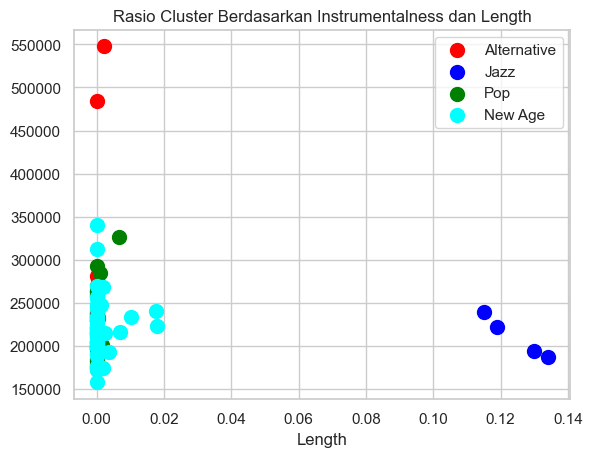

In [74]:
plt.scatter(clus_0['instrumentalness'], clus_0['length'], s=100, c='red', label='Alternative')
plt.scatter(clus_1['instrumentalness'], clus_1['length'], s=100, c='blue', label='Jazz')
plt.scatter(clus_2['instrumentalness'], clus_2['length'], s=100, c='green', label='Pop')
plt.scatter(clus_3['instrumentalness'], clus_3['length'], s=100, c='cyan', label='New Age')
plt.title('Rasio Cluster Berdasarkan Instrumentalness dan Length')
plt.xlabel('Instrumentalness')
plt.xlabel('Length')
plt.legend()
plt.show()




##### The conclusion that can be drawn from this data mining analysis is that the clusters formed are 4 named Alternative, Jazz, Pop, and, New age.

#### Thank you. Here is a list of learning resources I use:

1. Crawling Data: https://medium.com/@reynaldy99/ekstrak-data-playlist-spotify-dengan-spotify-api-menggunakan-python-8266b1cbadef

2. Exploratory Data Analysis (EDA): https://www.youtube.com/watch?v=bynsxAbjImQ

3. K-Means Clustering: https://youtu.be/HV8-QS6QJsg?si=VR1WgIBNGIbkV20H